### Bank Customer Churn Feature Selection

This program is based upon common data science programs, Kaggle customer churn modeling dataset and yellowbrick library sample programs.

In [4]:
# Import Common Libraries
import numpy as np
import numpy as np
import pandas as pd

In [5]:
# Import dataset with features and targets columns
dataset = pd.read_csv('Churn_Modelling_Encoded.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Define features, target and target classes
features =[
     'CreditScore'
    ,'Geography'
    ,'Gender'
    ,'Age'
    ,'Tenure'
    ,'Balance'
    ,'NumOfProducts'
    ,'HasCrCard'
    ,'IsActiveMember'
    ,'EstimatedSalary'
]

target   = ['Exited']

classes = ['no', 'yes']

In [8]:
# Transform features and target to numpy matrix for yellowbrick visualization
X = dataset[features].as_matrix()
y = dataset.Exited.as_matrix()

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


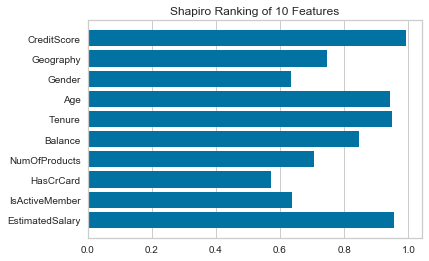

In [9]:
# 1 dimension visualizer with Shapiro ranking
from yellowbrick.features import Rank1D

visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

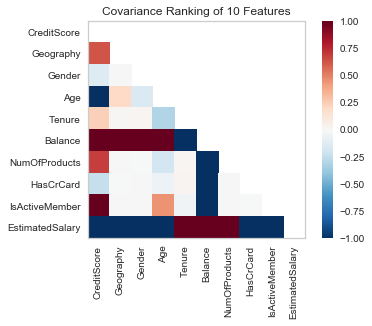

In [10]:
# 2 dimension visualizer with covariance ranking
from yellowbrick.features import Rank2D

visualizer = Rank2D(features=features, algorithm='covariance')
visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

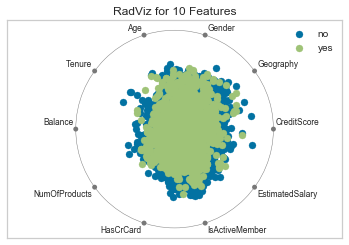

In [11]:
# RadViz visualizer
from yellowbrick.features import RadViz

visualizer = RadViz(classes=classes, features=features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

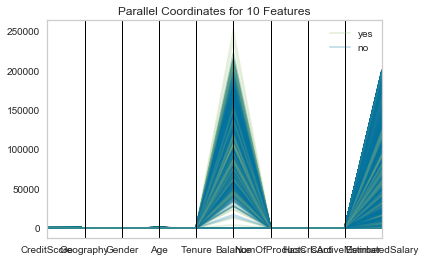

In [12]:
# Parallel Coordinates visualizer
from yellowbrick.features import ParallelCoordinates

visualizer = ParallelCoordinates(classes=classes, features=features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

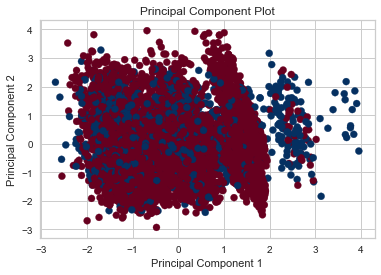

In [6]:
# Principal Component Analysis Decomposition visualizer
from yellowbrick.features import PCADecomposition

visualizer = PCADecomposition(scale=True, center=False, color=y)
visualizer.fit_transform(X,y)
visualizer.poof()

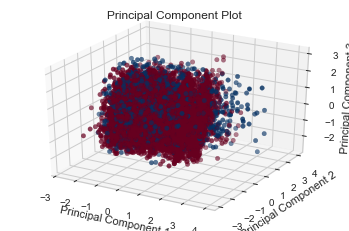

In [7]:
visualizer = PCADecomposition(
    scale=True, center=False, color=y, proj_dim=3
)
visualizer.fit_transform(X,y)
visualizer.poof()

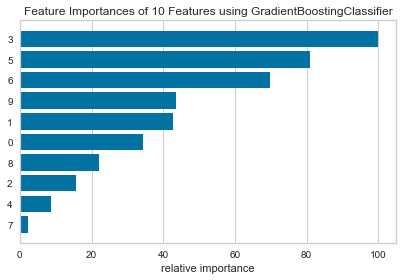

In [8]:
# Gradient Boosting Classifier Visualizer
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from yellowbrick.features import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(X, y)
viz.poof()

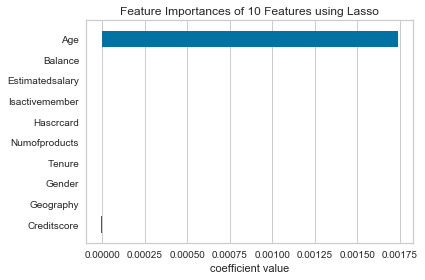

In [9]:
# Feature Importances with Lasso
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from yellowbrick.features.importances import FeatureImportances

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(Lasso(), ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

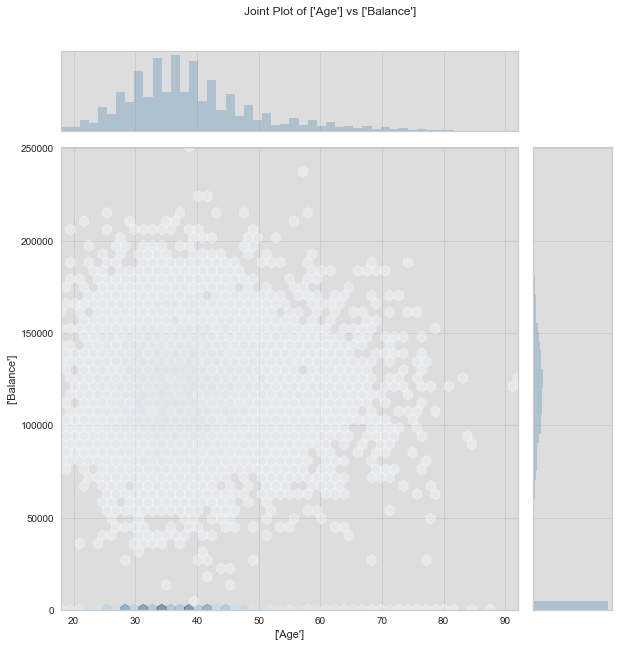

In [15]:
# Joint Plot Visualizer with single feature and target 
from yellowbrick.features import JointPlotVisualizer

# Define jpv_feature (x-axis) and target (y-axis)
feature_jpv  = ['Age']
target_jpv = ['Balance']

# Transform feature and target to numpy matrix for yellowbrick visualization
X_jpv = dataset[feature_jpv].as_matrix()
y_jpv = dataset[target_jpv].as_matrix()

visualizer = JointPlotVisualizer(feature=feature_jpv, target=target_jpv, joint_plot = 'hex')
visualizer.fit(X_jpv, y_jpv)
visualizer.poof()